#TMRCA Sample#
##Compare TMRCA for different scenariors to look at how unusal result is##

In [38]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np

import pandas as pd
import scipy.misc

import getpass
import os

# since computers have different users...
#userName = getpass.getuser()
#dropBoxDir = '/Users/' + ''userName'' + '/Dropbox'
#change to that dir
#dbDataDir = dropBoxDir + '/jeffs-docs/projects/primates/consortium/2013-samples-JK/chimp-chrY/tmrca'
#os.chdir(dbDataDir)
print 'User name is:', userName
print 'Current working dir is:\n',os.getcwd()

User name is: moetjens
Current working dir is:
/Users/moetjens/Desktop


In [39]:
# setup functions for getting tmrca values

def tmrca_k(Ne,k):
    '''returns a sample tmrca for k lineages with populaiton size Ne
       value is in generations
    '''
    tmrca = 0
    for i in range(2,k+1):
        lambda_i = scipy.misc.comb(i,2,exact=True)  #get the scale param
        beta = 1.0/lambda_i
        t = np.random.exponential(beta)
        tmrca += t
    tmrca = tmrca * Ne
    return tmrca

def tmrca_2(Ne):
    '''return a sample tmrca for special case of 2 lineages drawn from 
       population of size Ne.  Value is in generations'''    
    tmrca = np.random.exponential(1.0) * Ne
    return tmrca
    

#Returns effective Y chromosomes and Mito (in that order)
def effectiveChroms(R, Nauto):
    '''returns number of effective Y and Mito chroms for given R'''
    Nf = Nauto*(1 + R)/(4*R)
    Nm = Nf*R
    NchrY = Nm/2
    Nmito = Nf/2
    return NchrY,Nmito

#ex.
#chrY, mito  = effectiveChroms(0.5,56300)     
    
    

In [40]:
#setup samples to see that it is working
numDraws = 10000
Ne= 2*10000  # for diploid
t_100 = []
for i in xrange(numDraws):
    t_100.append(tmrca_k(10000,500))

In [41]:
# print stats
print 'For k = 100'
print np.mean(t_100),np.median(t_100),np.std(t_100)

For k = 100
20104.571782 17431.2806068 10872.1875184


In [42]:
#setup to make the poznik plot, Figure 3
numDraws = 100000

baka_ne = 1800
baka_g = 31.5/1000 # convert to kya
baka_tmrca = []
for i in xrange(numDraws):
    baka_tmrca.append(tmrca_k(baka_ne,100)*baka_g)
    
mbuti_ne = 3700
mbuti_g = 26.5/1000 # convert to kya
mbuti_tmrca = []
for i in xrange(numDraws):
    mbuti_tmrca.append(tmrca_k(mbuti_ne,100)*mbuti_g)
   
    
    

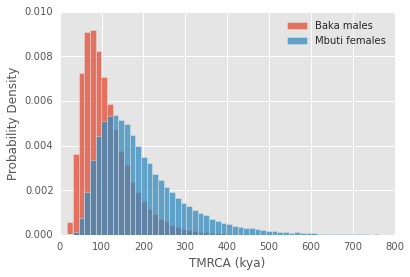

In [44]:
# make plot
poznikDF = pd.DataFrame({'Baka males': baka_tmrca, 'Mbuti females': mbuti_tmrca})


myPlot = poznikDF.plot(kind='hist', bins=100,xlim=[0,800],
                     alpha=0.75, normed = True)

myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


In [45]:
print '2',tmrca_2(1000)
print '2k',tmrca_k(1000,2)

2 1266.9400627
2k 878.850882052


In [46]:
numDraws = 100000

Ne = 10000
g = 30/1000.0

test2 = []
testk = []
for i in xrange(numDraws):
    testk.append(tmrca_k(Ne,100)*g)
    test2.append(tmrca_2(Ne)*g)

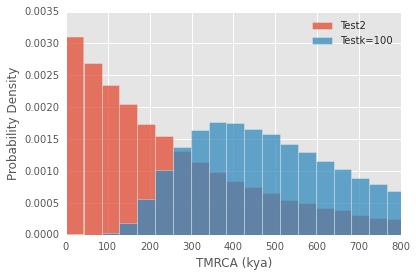

In [47]:
# make plot
test2DF = pd.DataFrame({'Test2': test2, 'Testk=100': testk})


myPlot = test2DF.plot(kind='hist', bins=100,xlim=[0,800],
                     alpha=0.75, normed = True)

myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


In [48]:
test2DF.describe ()

,Test2,Testk=100
count,100000.000000,100000.000000
mean,300.522620,595.272835
std,300.506198,325.216648
min,0.006596,91.142233
25%,86.470384,367.508000
50%,207.743147,516.119671
75%,416.990831,736.306025
max,3788.184552,4262.502887


In [50]:
r = 1.0
y,m = effectiveChroms(r,10000)
print r,y,m

r = 0.5
y,m = effectiveChroms(r,10000)
print r,y,m


1.0 2500.0 2500.0
0.5 1875.0 3750.0


In [77]:
numDraws = 100000

Ne = 10600

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
differences = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    differences[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_2(NeVals[r][0])*g
        mtmrca = tmrca_2(NeVals[r][1])*g
        d = mtmrca-ytmrca
        differences[r].append(d)
        



In [78]:
# make plot
diffDF = pd.DataFrame(differences)

diffDF.describe()

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1.0
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3306.985805,657.913396,327.454721,158.222591,100.330611,69.962054,50.342113,0.346570
std,3354.721334,693.901306,365.769501,202.962122,149.239738,125.172568,111.628577,93.581138
min,-196.132236,-304.047524,-373.714005,-570.597752,-425.225801,-434.732343,-501.874236,-616.981060
25%,920.380657,164.734452,70.057719,20.566725,3.337441,-5.934296,-13.945763,-45.300955
50%,2279.512942,445.344027,216.821373,100.290318,62.117105,41.685949,29.065906,0.301647
75%,4592.657008,925.323445,470.770072,237.749597,160.997559,122.282820,97.552339,46.040222
max,41474.106158,8275.364343,4599.017677,2269.666447,1630.088247,1248.254021,1324.961737,743.331884


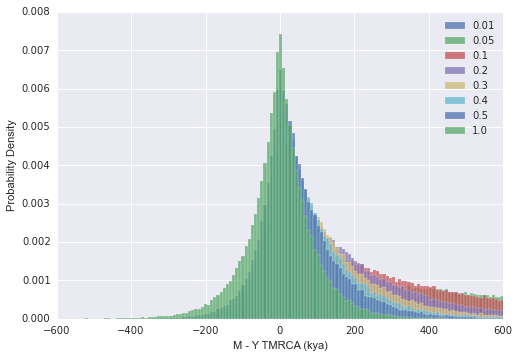

In [87]:
diffPlot = diffDF.plot(kind='hist',bins=5000,xlim=[-600,600],
                     alpha=0.75, normed = True)

diffPlot.set_xlabel('M - Y TMRCA (kya)')
diffPlot.set_ylabel('Probability Density')

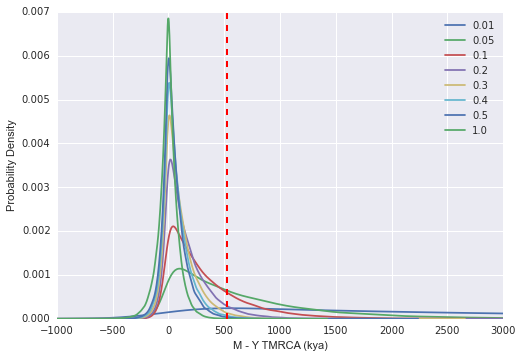

In [81]:
obsDiff = 529  #observed difference 529 ky

diffPlot = diffDF.plot(kind='kde',
                     xlim=[-1000,3000])


plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_xlabel('M - Y TMRCA (kya)')
diffPlot.set_ylabel('Probability Density')

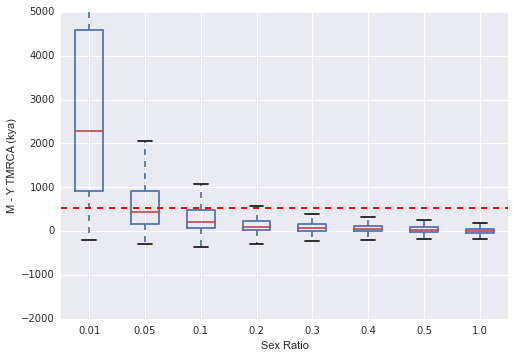

In [82]:

diffPlot = diffDF.plot(kind='box')


plt.axhline(y=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_ylim([-2000,5000])
diffPlot.set_ylabel('M - Y TMRCA (kya)')
diffPlot.set_xlabel('Sex Ratio')



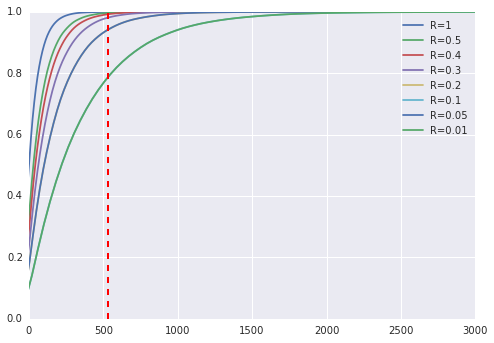

In [86]:
#!pip install seaborn

import seaborn as sns
sns.set(color_codes=True)

obsDiff = 529  #observed difference 529 ky



sns.kdeplot(np.array(differences[1]),cumulative=True,label='R=1')
sns.kdeplot(np.array(differences[0.5]),cumulative=True,label='R=0.5')
sns.kdeplot(np.array(differences[0.4]),cumulative=True,label='R=0.4')
sns.kdeplot(np.array(differences[0.3]),cumulative=True,label='R=0.3')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.2')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.1')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.05')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.01')


plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_xlabel('M - Y TMRCA (kya)')
diffPlot.set_ylabel('Cumulative Fraction')

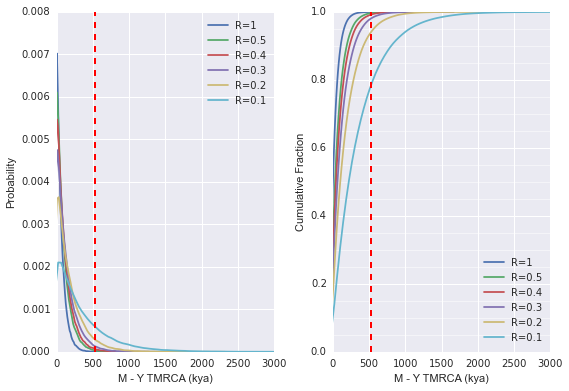

In [84]:
obsDiff = 529  #observed difference 529 ky
# Set up the matplotlib figure
ax = plt.subplot(1,2,1)

sns.kdeplot(np.array(differences[1]),cumulative=False,label='R=1',ax=ax)
sns.kdeplot(np.array(differences[0.5]),cumulative=False,label='R=0.5',ax=ax)
sns.kdeplot(np.array(differences[0.4]),cumulative=False,label='R=0.4',ax=ax)
sns.kdeplot(np.array(differences[0.3]),cumulative=False,label='R=0.3',ax=ax)
sns.kdeplot(np.array(differences[0.2]),cumulative=False,label='R=0.2',ax=ax)
sns.kdeplot(np.array(differences[0.1]),cumulative=False,label='R=0.1',ax=ax)

plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')
ax.set_xlabel('M - Y TMRCA (kya)')
ax.set_ylabel('Probability')


ax = plt.subplot(1,2,2)

sns.kdeplot(np.array(differences[1]),cumulative=True,label='R=1')
sns.kdeplot(np.array(differences[0.5]),cumulative=True,label='R=0.5')
sns.kdeplot(np.array(differences[0.4]),cumulative=True,label='R=0.4')
sns.kdeplot(np.array(differences[0.3]),cumulative=True,label='R=0.3')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.2')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.1')

plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

yticks = range(0,101,10)
yticks = [j/100.0 for j in yticks]

ysubticks = range(5,101,10)
ysubticks = [j/100.0 for j in ysubticks]

#ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
#ax.tick_params(which = 'minor', labelsize = 0)


#ax.set_yticks(yticks)
#ax.set_yticks(ysubticks,minor=True)
#ax.set_ysubticks(subticks)

ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

#ax.yaxis.grid(True, which="minor")
ax.set_xlabel('M - Y TMRCA (kya)')
ax.set_ylabel('Cumulative Fraction')

plt.tight_layout()



In [85]:
print 'Observed Difference is %i ky' % obsDiff
for r in rVals:
    numGE = 0
    for d in differences[r]:
        if d >= obsDiff:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsDiff)

Observed Difference is 529 ky
For R = 0.01, 84.3370 percent are greater than 529 ky
For R = 0.05, 44.3420 percent are greater than 529 ky
For R = 0.10, 21.3010 percent are greater than 529 ky
For R = 0.20, 5.8270 percent are greater than 529 ky
For R = 0.30, 1.8820 percent are greater than 529 ky
For R = 0.40, 0.7590 percent are greater than 529 ky
For R = 0.50, 0.3380 percent are greater than 529 ky
For R = 1.00, 0.0200 percent are greater than 529 ky
